
Comparative Analysis of Machine Learning Models for Activity Recognition using "MHEALTH Dataset"

In [1]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 70.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

Dataset Exploration

In [36]:
df = pd.read_csv("/content/mhealth_raw_data.csv")
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0,subject10
1215741,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0,subject10
1215742,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0,subject10
1215743,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0,subject10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152768 entries, 0 to 1152767
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1152768 non-null  float64
 1   aly       1152768 non-null  float64
 2   alz       1152768 non-null  float64
 3   glx       1152768 non-null  float64
 4   gly       1152768 non-null  float64
 5   glz       1152768 non-null  float64
 6   arx       1152768 non-null  float64
 7   ary       1152768 non-null  float64
 8   arz       1152768 non-null  float64
 9   grx       1152768 non-null  float64
 10  gry       1152768 non-null  float64
 11  grz       1152767 non-null  float64
 12  Activity  1152767 non-null  float64
 13  subject   1152767 non-null  object 
dtypes: float64(13), object(1)
memory usage: 123.1+ MB


In [5]:
df.describe()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
count,1.152768e+06,1.152768e+06,1.152768e+06,1.152768e+06,1.152768e+06,1.152768e+06,1.152768e+06,1.152768e+06,1.152768e+06,1.152768e+06,1.152768e+06,1.152767e+06,1.152767e+06
mean,1.500558e+00,-9.703349e+00,-9.471699e-01,-9.054157e-03,-6.156253e-01,-1.437378e-01,-3.665356e+00,-5.777898e+00,2.438283e+00,-2.837490e-01,-4.556943e-01,2.712299e-01,1.672534e+00
std,3.769435e+00,4.126375e+00,5.429398e+00,4.944933e-01,3.555160e-01,5.481096e-01,4.740013e+00,5.784245e+00,3.888080e+00,5.293976e-01,5.584339e-01,5.646101e-01,3.226325e+00
min,-2.214600e+01,-1.961900e+01,-1.937300e+01,-2.146600e+00,-7.789900e+00,-2.626700e+00,-2.236100e+01,-1.897200e+01,-1.823900e+01,-8.339200e+00,-3.570800e+00,-2.689700e+00,0.000000e+00
25%,1.809600e-01,-1.019400e+01,-2.626100e+00,-4.434100e-01,-8.142600e-01,-5.776000e-01,-6.018125e+00,-9.404900e+00,2.012700e-01,-7.098000e-01,-8.850100e-01,-2.306000e-01,0.000000e+00
50%,1.339700e+00,-9.666700e+00,-1.961900e-02,-3.710600e-02,-7.035600e-01,-1.611000e-01,-2.935600e+00,-7.458600e+00,1.999400e+00,-3.627500e-01,-6.242300e-01,3.060300e-01,0.000000e+00
75%,2.583600e+00,-9.055300e+00,1.309200e+00,4.452700e-01,-5.384600e-01,3.398800e-01,-1.151600e+00,-2.476200e+00,4.947900e+00,7.451000e-02,-8.418900e-02,7.844800e-01,1.000000e+00
max,2.005400e+01,2.116100e+01,2.501500e+01,6.048400e+01,2.011300e+00,2.770100e+00,1.986400e+01,2.219100e+01,2.574100e+01,3.319600e+00,1.556500e+00,2.750000e+00,1.200000e+01


In [6]:
df.isna().sum()

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         1
Activity    1
subject     1
dtype: int64

In [7]:
df.duplicated().sum()

0

In [94]:
# Drop a single column
df.drop('subject', axis=1, inplace=True)

# Get 8000 row from each
target0 = df[df['Activity'] == 0].head(8000)
target1 = df[df['Activity'] == 1].head(8000)
target2 = df[df['Activity'] == 2].head(8000)
target3 = df[df['Activity'] == 3].head(8000)
target4 = df[df['Activity'] == 4].head(8000)
target5 = df[df['Activity'] == 5].head(8000)
target6 = df[df['Activity'] == 6].head(8000)
target7 = df[df['Activity'] == 7].head(8000)
target8 = df[df['Activity'] == 8].head(8000)
target9 = df[df['Activity'] == 9].head(8000)
target10 = df[df['Activity'] == 10].head(8000)
target11 = df[df['Activity'] == 11].head(8000)
target12 = df[df['Activity'] == 12].head(8000)
# Concatenate the three DataFrames
df = pd.concat([target0, target1, target2 , target3 , target4 , target5 ,
                    target6 , target7 , target8 , target9 , target10 , target11 , target12])

# Shuffle the DataFrame
df = df.sample(frac=1, random_state=42)

df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
247356,2.19470,-9.1985,-4.01090,-0.384040,-0.62852,-0.778000,-1.20590,-7.3402,0.97674,-0.319610,-0.94867,-0.37069,8.0
410198,-1.79920,-10.4530,-5.67600,-0.447120,-1.17070,0.603140,-0.62193,-12.0060,2.39970,-0.927450,-0.57700,0.34698,5.0
255440,5.90560,-13.3080,4.79990,0.543600,-0.81989,-0.053045,-12.29400,-10.8890,9.09100,0.037255,-0.51129,1.04090,10.0
13016,0.56543,-9.6537,0.97089,0.500930,-0.86116,-0.530450,-5.17230,-7.2717,3.83430,0.168630,-0.70842,0.39655,2.0
64423,0.83438,-9.7512,-2.84380,-0.356220,-0.96811,0.106090,-1.16530,-7.9650,0.49758,-0.735290,-0.68994,0.44397,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234042,-0.18146,-10.1760,-0.77103,-0.573280,-0.74109,-0.616900,-5.42210,-7.4245,-0.45456,-0.156860,-0.91581,-0.50647,6.0
78526,-1.60910,-8.8264,-4.42620,0.768090,-0.71107,-0.051081,3.33850,-12.5310,5.89430,0.666670,-0.62218,1.01290,9.0
528503,-21.33500,-19.1480,22.82900,-0.502780,-0.81238,0.353630,-3.38750,-11.3900,1.04510,-0.860780,0.13552,0.66379,12.0
2198,2.03540,-10.1930,0.48986,-0.057514,-0.86116,-0.626720,-2.99740,-9.1105,0.95073,0.290200,-1.07390,-0.29095,0.0


Dataset Analysis

In [9]:
numerical_columns = df.select_dtypes(include='number').columns
categorical_columns = df.select_dtypes(include='object').columns

<Axes: >

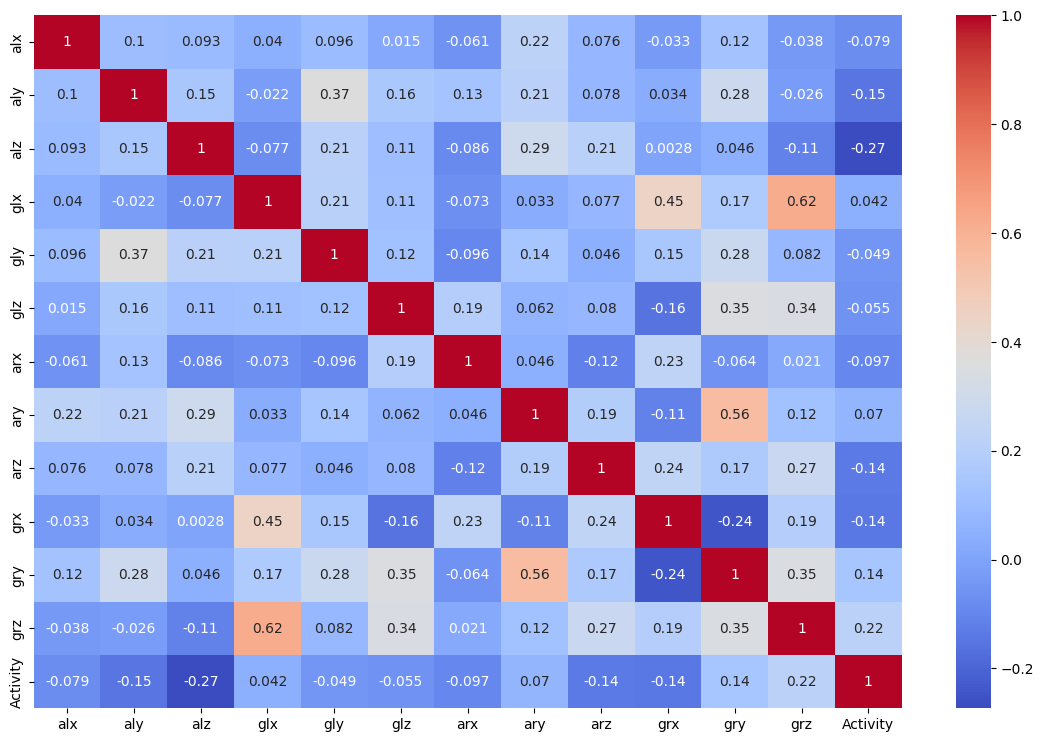

In [10]:
corr = df[numerical_columns].corr()
plt.figure(figsize=(14, 9))
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [11]:
df[categorical_columns].nunique()

Series([], dtype: float64)

<Axes: xlabel='Activity', ylabel='count'>

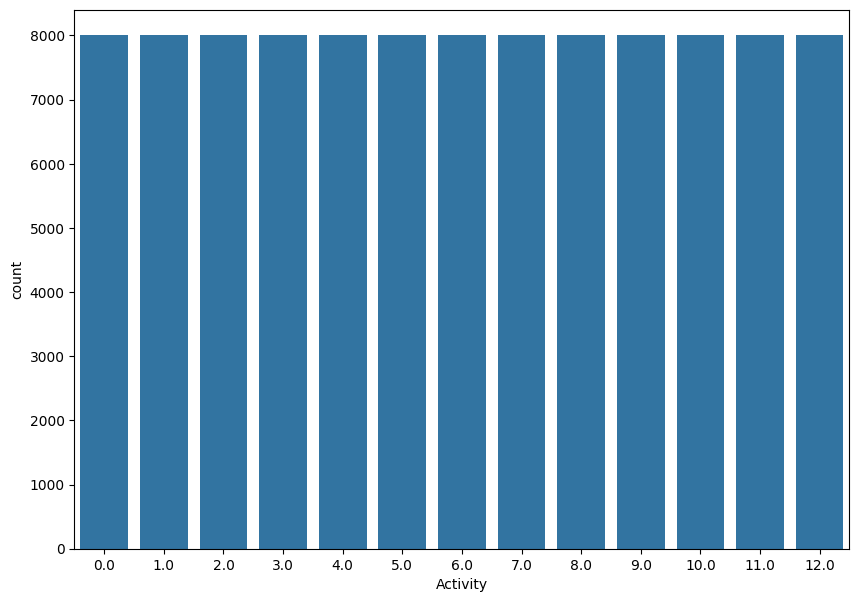

In [12]:
plt.figure(figsize=(10, 7))
sns.countplot(df, x='Activity')

array([[<Axes: title={'center': 'alx'}>, <Axes: title={'center': 'aly'}>,
        <Axes: title={'center': 'alz'}>, <Axes: title={'center': 'glx'}>],
       [<Axes: title={'center': 'gly'}>, <Axes: title={'center': 'glz'}>,
        <Axes: title={'center': 'arx'}>, <Axes: title={'center': 'ary'}>],
       [<Axes: title={'center': 'arz'}>, <Axes: title={'center': 'grx'}>,
        <Axes: title={'center': 'gry'}>, <Axes: title={'center': 'grz'}>],
       [<Axes: title={'center': 'Activity'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

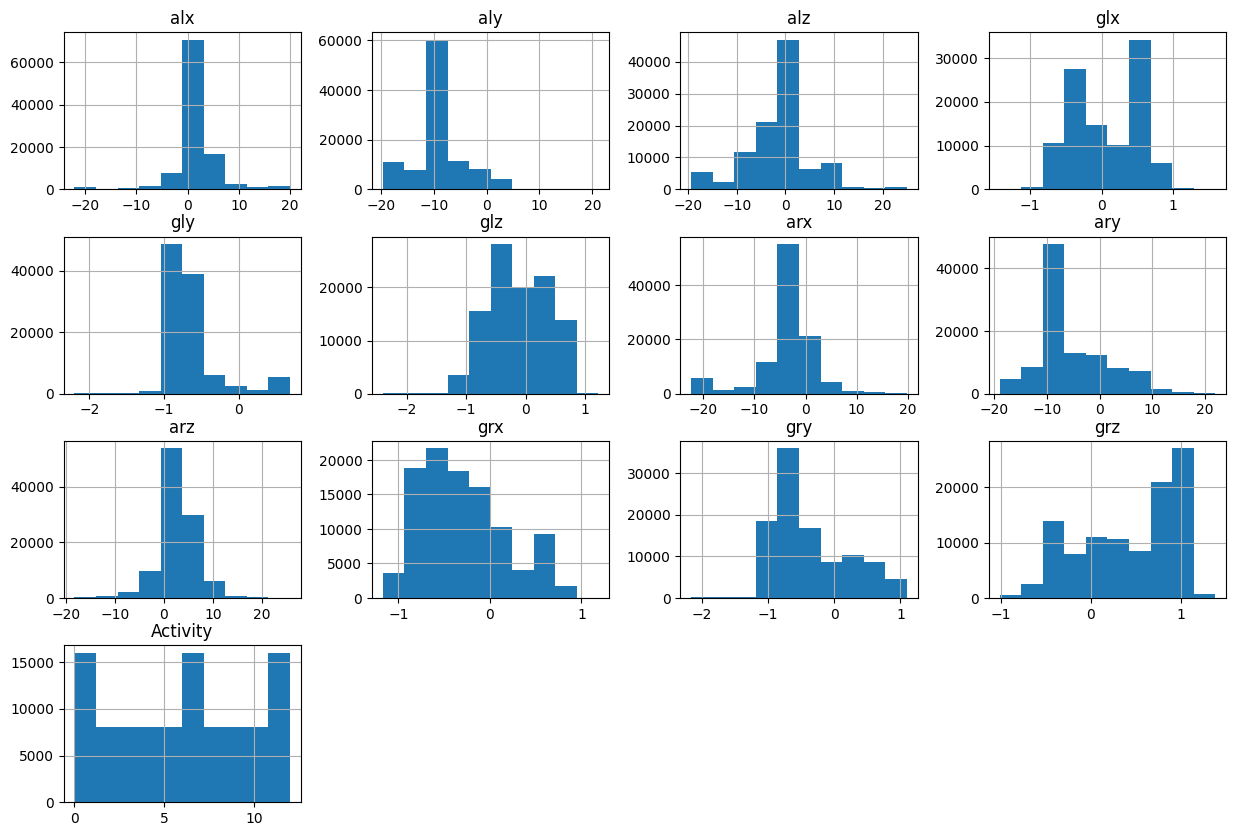

In [13]:
df.hist(figsize=(15, 10))

In [15]:
df.shape

(104000, 13)

Model Training

Split The dataset

1-Knn

In [48]:
# It fits a standard scaler to the features
# transforms these features to have zero mean and unit variance, and returns the scaled features.
x = df.iloc[: , : -1]
# Scaling the data
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
x

array([[-0.25895808,  0.03475668,  0.49452548, ..., -1.4334374 ,
        -0.17038137, -0.36942088],
       [ 0.46065193,  0.36143843, -0.62127453, ..., -0.08935082,
        -1.6520061 ,  0.10629617],
       [ 0.44366823,  0.07515988, -0.61070949, ..., -0.49258751,
         1.45120653,  0.87296736],
       ...,
       [-3.46341134,  2.09302829,  2.88544445, ..., -0.48419031,
         1.12113737, -2.46498757],
       [ 0.09367864, -0.11284367,  0.28646781, ...,  0.98591844,
        -1.25016455, -1.36806729],
       [-0.42871679, -0.13115753,  0.4610363 , ..., -1.1394285 ,
        -0.54348251, -0.55420202]])

In [18]:
# Put The target in y
y = df.iloc[: , -1]
y

63340      8.0
159318     5.0
88198     10.0
212376     2.0
62907      8.0
          ... 
327911     6.0
286676     9.0
978089    12.0
860        0.0
298100     1.0
Name: Activity, Length: 104000, dtype: float64

In [20]:
# Divide the data into 80% training and 30% test
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , shuffle = True , random_state = 0)

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

print(x_train.shape)
print(x_test.shape)

(72800, 12)
(31200, 12)


In [22]:
# Normalize the data
scaler = Normalizer().fit(x_train)
#Apply the normalizer on the train data
x_train_normalized = scaler.transform(x_train)
#Apply the normalizer on the test data
x_test_normalized = scaler.transform(x_test)
print(x_train_normalized)

[[-0.10179793 -0.0575143   0.18503097 ...  0.36252342 -0.35773586
   0.41397373]
 [-0.09043131 -0.02544923  0.25478761 ... -0.36573712 -0.1945384
   0.17459864]
 [ 0.10649203 -0.3236051  -0.23625491 ... -0.06417237  0.02109399
   0.17513963]
 ...
 [ 0.08700946  0.37967698  0.29618442 ...  0.03532094  0.36532378
   0.12024963]
 [-0.35662389  0.03295294 -0.0544442  ... -0.09992673 -0.12037285
   0.43289655]
 [-0.11891722 -0.04324114  0.16360218 ... -0.36537401 -0.32335742
  -0.30241319]]


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [26]:
# Hyper Tuning--> to find the best hyperparameters
param_grid_KNN = {'n_neighbors': [3, 5, 7, 9, 11]}
knn = KNeighborsClassifier()
# Perform grid search
grid_search_KNN = GridSearchCV(knn, param_grid_KNN, cv=5, scoring='accuracy')
grid_search_KNN.fit(x_train_normalized, y_train)
# Get the best hyperparameters
best_params_KNN = grid_search_KNN.best_params_
print("Best Hyperparameters:", best_params_KNN)

Best Hyperparameters: {'n_neighbors': 3}


In [28]:
# Training the model
knn = KNeighborsClassifier(**best_params_KNN)
knn.fit(x_train_normalized , y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
# Prdict
y_pred_knn = knn.predict(x_test_normalized)

In [49]:
# It performs 5-fold cross-validation on the normalized training data using a KNN classifier,
#  then prints the accuracy for each fold and the average accuracy across all folds.
# Cross Validetion
kf = KFold(n_splits=5)
cv_results = cross_val_score(knn, x_train_normalized, y_train, cv=kf)
print("Cross-validation results:", cv_results)
print("Mean CV accuracy:", cv_results.mean())

Cross-validation results: [0.96813187 0.9657967  0.96723901 0.96311813 0.96401099]
Mean CV accuracy: 0.9656593406593407


KNN Evaluation

In [39]:
from sklearn.metrics import accuracy_score, classification_report

In [37]:
# Accuracy
Accuracy_knn = accuracy_score(y_test , y_pred_knn)
Accuracy_knn

0.9650641025641026

In [41]:
# "precision","recall","f1-score","support"
KNN_report = classification_report(y_test, y_pred_knn)
print(KNN_report)

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94      2410
         1.0       0.95      0.97      0.96      2406
         2.0       1.00      1.00      1.00      2393
         3.0       1.00      1.00      1.00      2432
         4.0       0.99      1.00      0.99      2395
         5.0       1.00      0.99      0.99      2305
         6.0       1.00      1.00      1.00      2393
         7.0       0.99      1.00      0.99      2369
         8.0       0.99      0.99      0.99      2474
         9.0       1.00      1.00      1.00      2388
        10.0       0.83      0.91      0.87      2351
        11.0       0.90      0.85      0.87      2499
        12.0       0.97      0.90      0.93      2385

    accuracy                           0.97     31200
   macro avg       0.97      0.97      0.97     31200
weighted avg       0.97      0.97      0.97     31200



In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

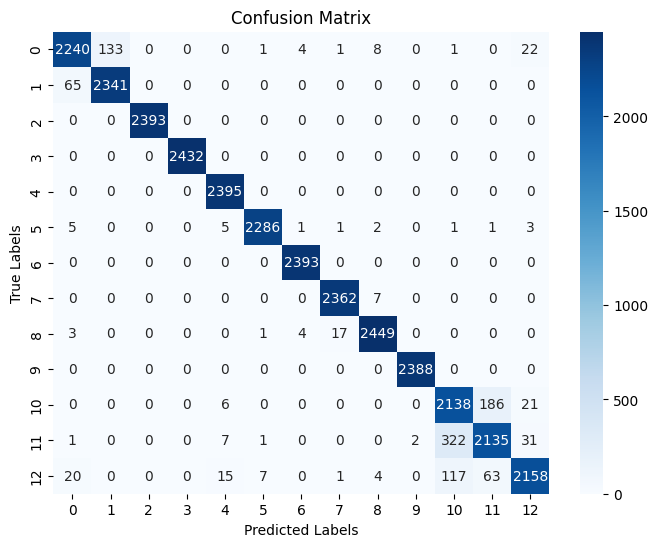

In [43]:
# Confusion matrix
KNN_Confusion= confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(KNN_Confusion, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

2-Linear Regression

In [46]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

In [59]:
# fits a linear regression model to the normalized training data
# then returns the R-squared scores for both the training data and the test data.
lin_reg = LinearRegression().fit(x_train_normalized, y_train)
lin_reg.score(x_train_normalized, y_train), lin_reg.score(x_test_normalized, y_test)

(0.23179013320663255, 0.23704860274622008)

In [50]:
# transforms the training and test datasets by adding polynomial features (degree 2) to enhance the feature set.
poly_2 = PolynomialFeatures(2)
X_train_2 = poly_2.fit_transform(x_train)
X_test_2 = poly_2.fit_transform(x_test)
# Fits a linear regression model to the enhanced training data.
lin_reg2 = LinearRegression().fit(X_train_2, y_train)
# Predicts the target values for the enhanced test data using the fitted model.
linear_reg_y_pred = lin_reg2.predict(X_test_2)
# Calculates and returns the R-squared scores of the model on both the enhanced training data and the test data.
lin_reg2.score(X_train_2, y_train), lin_reg2.score(X_test_2, y_test)

(0.6554540141678574, 0.6527194753979817)

In [51]:
kf = KFold(n_splits=5)
lin_cv_results = cross_val_score(lin_reg2, X_train_2, y_train, cv=kf)
print("Cross-validation results:", lin_cv_results)
print("Mean CV accuracy:", lin_cv_results.mean())

Cross-validation results: [0.65563062 0.64959683 0.66278701 0.6554359  0.64616856]
Mean CV accuracy: 0.6539237824998846


In [52]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [55]:
# calculates the mean squared error and root mean squared error between the predicted and actual values on the test data
mse = mean_squared_error(y_test, linear_reg_y_pred)
rmse = np.sqrt(mse)
print("(MSE): ", mse)
print("(RMSE): ", rmse)


(MSE):  4.882822052781007
(RMSE):  2.209710852754497


3-SVM

In [54]:
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC

In [56]:
SVM = SVC(C =5, kernel='rbf', gamma=0.5)
SVM.fit(x_train_normalized, y_train)

SVC(C=5, gamma=0.5)

In [60]:
# It predicts the target values using an SVM with an RBF kernel, calculates the prediction accuracy on the test data
SVM_y_pred = SVM.predict(x_test_normalized)
accuracy = accuracy_score(y_test, SVM_y_pred)
print(f'Accuracy with " rbf " kernel: {accuracy:.2f}')

Accuracy with " rbf " kernel: 0.96


SVM Evaluation

In [62]:
#conducts 5-fold cross-validation with an SVM on normalized training data, then prints the accuracy scores for each fold.
kf = KFold(n_splits=5)
SVM_CV = cross_val_score(SVM, x_train_normalized, y_train, cv=kf)
print("Cross-validation results:", SVM_CV)
print("Mean CV accuracy:", SVM_CV.mean())

Cross-validation results: [0.96394231 0.96325549 0.96346154 0.96243132 0.96201923]
Mean CV accuracy: 0.9630219780219781


In [63]:
# "precision","recall","f1-score","support"
SVM_report = classification_report(y_test, SVM_y_pred)
print(SVM_report)

              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93      2410
         1.0       0.91      1.00      0.95      2406
         2.0       1.00      1.00      1.00      2393
         3.0       1.00      1.00      1.00      2432
         4.0       0.99      1.00      0.99      2395
         5.0       0.99      0.98      0.99      2305
         6.0       1.00      1.00      1.00      2393
         7.0       0.99      1.00      0.99      2369
         8.0       0.99      0.99      0.99      2474
         9.0       1.00      1.00      1.00      2388
        10.0       0.85      0.89      0.87      2351
        11.0       0.88      0.87      0.88      2499
        12.0       0.95      0.92      0.94      2385

    accuracy                           0.96     31200
   macro avg       0.96      0.96      0.96     31200
weighted avg       0.96      0.96      0.96     31200



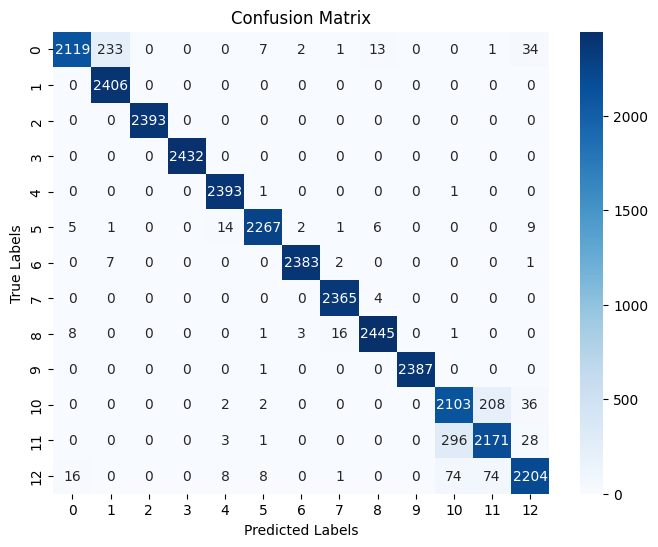

In [65]:
# Confusion matrix
cm_svm = confusion_matrix(y_test, SVM_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

4-Neural Network

In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense

In [22]:
data = pd.read_csv(r'/content/mhealth_raw_data.csv')
X = data.drop(['Activity', 'subject'], axis=1)
y = data['Activity']

In [23]:
# Scales the features in the dataset X using standard scaling, which normalizes each feature to have zero mean and unit variance.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [24]:
# encodes the target variable y using one-hot encoding, converting categorical labels into a binary matrix representation.
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))
y_encoded_dense = y_encoded.toarray()
# splits the scaled feature matrix X_scaled and the encoded target matrix y_encoded_dense into training and test sets, with 20% of the data reserved for testing
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_encoded_dense, test_size=0.2, random_state=42)

In [25]:
import tensorflow as tf

In [26]:
Nural_model = Sequential([
    Dense(64, input_shape=(x_train.shape[1],), activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')  # Output layer
])

Nural_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [27]:
# compiles it with categorical crossentropy loss and Adam optimizer, trains for 10 epochs, evaluates it on test data
Nural_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = Nural_model.fit(x_train, y_train, epochs=10)
test_loss, test_acc = Nural_model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')


Epoch 1/10
30394/30394 [==============================] - 69s 2ms/step - loss: 0.4026 - accuracy: 0.8325
Epoch 2/10
30394/30394 [==============================] - 64s 2ms/step - loss: 0.3098 - accuracy: 0.8665
Epoch 3/10
30394/30394 [==============================] - 63s 2ms/step - loss: 0.2872 - accuracy: 0.8766
Epoch 4/10
30394/30394 [==============================] - 65s 2ms/step - loss: 0.2738 - accuracy: 0.8826
Epoch 5/10
30394/30394 [==============================] - 63s 2ms/step - loss: 0.2643 - accuracy: 0.8867
Epoch 6/10
30394/30394 [==============================] - 65s 2ms/step - loss: 0.2577 - accuracy: 0.8900
Epoch 7/10
30394/30394 [==============================] - 63s 2ms/step - loss: 0.2525 - accuracy: 0.8923
Epoch 8/10
30394/30394 [==============================] - 65s 2ms/step - loss: 0.2487 - accuracy: 0.8939
Epoch 9/10
30394/30394 [==============================] - 63s 2ms/step - loss: 0.2454 - accuracy: 0.8956
Epoch 10/10
30394/30394 [==============================

In [30]:
NN_y_pred =Nural_model.predict(x_test)

7599/7599 [==============================] - 67s 9ms/step


Neural Network Evaluation

In [32]:
import numpy as np
from sklearn.metrics import classification_report

# Convert predictions from probabilities to class labels
NN_y_pred_classes = np.argmax(NN_y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)  # Also ensure y_test is in label format if it's not

# Now generate the classification report
NN_report = classification_report(y_test_classes, NN_y_pred_classes)
print(NN_report)


              precision    recall  f1-score   support

           0       0.94      0.91      0.92    174624
           1       0.76      0.94      0.84      6084
           2       0.74      0.78      0.76      6271
           3       0.75      0.90      0.82      6088
           4       0.79      0.81      0.80      6115
           5       0.88      0.78      0.82      6221
           6       0.80      0.86      0.82      5607
           7       0.78      0.92      0.84      5856
           8       0.81      0.73      0.77      5831
           9       0.79      0.88      0.83      6107
          10       0.81      0.80      0.81      6074
          11       0.76      0.89      0.82      6185
          12       0.68      0.55      0.61      2086

    accuracy                           0.89    243149
   macro avg       0.79      0.83      0.81    243149
weighted avg       0.89      0.89      0.89    243149



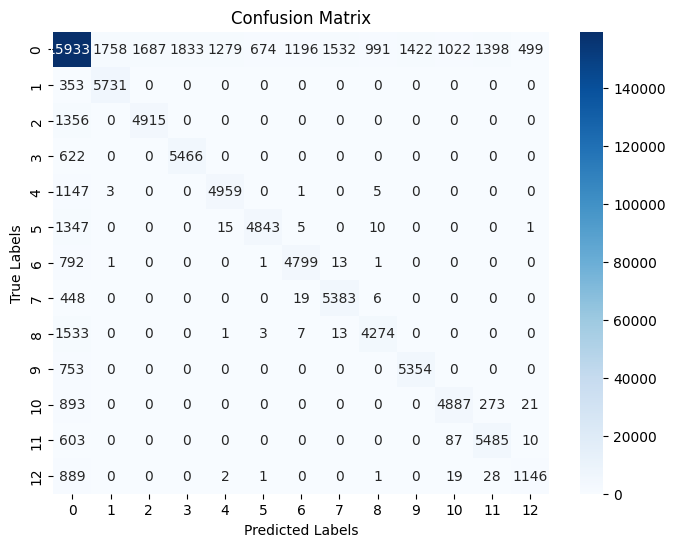

In [34]:
# Confusion matrix
Neural_Network_Confusion= confusion_matrix(y_test_classes, NN_y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(Neural_Network_Confusion, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

5-Logistic Regression

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [10]:
data = pd.read_csv('/content/mhealth_raw_data.csv')
X = data.drop(['Activity', 'subject'] , axis=1)
y = data['Activity']

In [11]:
# Scales the features in the dataset X using standard scaling, which normalizes each feature to have zero mean and unit variance.
logistic = LogisticRegression()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# splits the scaled feature matrix X_scaled and the encoded target matrix y_encoded_dense into training and test sets, with 20% of the data reserved for testing.
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
#one Vs all algorithm, set > multi_class='ovr'
classifier = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=1000)
classifier.fit(x_train,y_train)

LogisticRegression(max_iter=1000, multi_class='ovr', solver='liblinear')

In [14]:
Logistic_y_pred=classifier.predict(x_test)
print(accuracy_score(y_test,Logistic_y_pred))

0.728351751395235


Logistic Regression Evaluation

In [ ]:
#conducts 5-fold cross-validation with an Logistic on normalized training data, then prints the accuracy scores for each fold.
Logistic_CV = cross_val_score(classifier, x_train, y_train, cv=5)
print("Cross-validation results:", Logistic_CV)
print("Mean CV accuracy:", Logistic_CV.mean())

In [18]:
Logistic_Regression_report = classification_report(y_test, Logistic_y_pred)
print(Logistic_Regression_report)

              precision    recall  f1-score   support

           0       0.73      0.98      0.84    174624
           1       0.00      0.00      0.00      6084
           2       0.00      0.00      0.00      6271
           3       0.67      0.79      0.73      6088
           4       0.00      0.00      0.00      6115
           5       0.03      0.00      0.00      6221
           6       0.00      0.00      0.00      5607
           7       0.00      0.00      0.00      5856
           8       0.00      0.00      0.00      5831
           9       0.37      0.05      0.09      6107
          10       0.34      0.01      0.02      6074
          11       0.58      0.11      0.19      6185
          12       0.00      0.00      0.00      2086

    accuracy                           0.73    243149
   macro avg       0.21      0.15      0.14    243149
weighted avg       0.58      0.73      0.63    243149



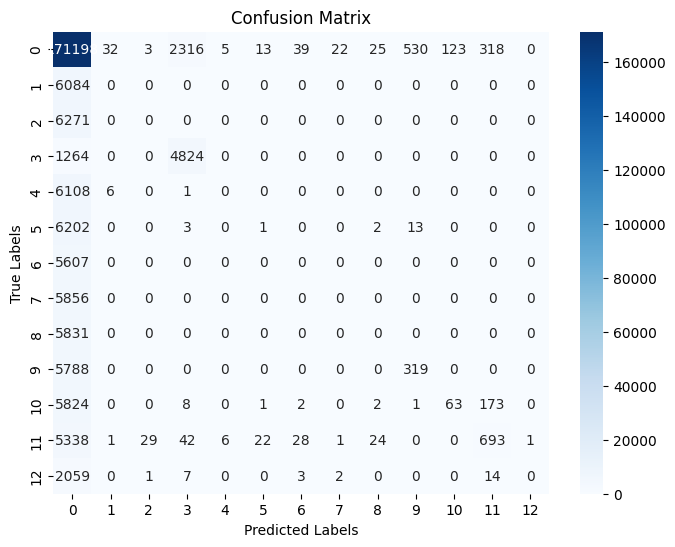

In [19]:
# Confusion matrix
Logistic_Regression_matrix= confusion_matrix(y_test, Logistic_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(Logistic_Regression_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()